# Implementação básica do algoritmo k-means

## Imports e Variáveis Globais

In [395]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output



PLOT_RESULTS = True
DEBUG = True

N = 10000
D = 4

K = 7
MAX_ITERATIONS = 500

## Criando o Dataset

- N datapoints
- Datapoints D-dimensionais
- Floats randomizados ➡ intervalo de [1, 10) (ou [1, 10], dependendo da método de arredondamento de float usado. Isto não deve ter nenhuma relevância estatística, no entanto)

In [396]:
dataset  = [[np.random.uniform(1, 10) for _ in range(D)] for _ in range(N)]
dataset = pd.DataFrame(dataset, columns=[f'd{i}' for i in range(D)])
dataset

,d0,d1,d2,d3
0,1.211660,5.637956,4.717642,8.996328
1,8.748159,4.023131,2.429584,9.215117
2,2.295081,8.643591,9.640366,9.674452
3,8.826171,1.068580,9.746820,1.835716
4,4.112604,2.900439,7.016215,3.725698
...,...,...,...,...
9995,9.162142,9.224073,9.921347,2.922410
9996,2.065371,2.123944,5.753422,7.256778
9997,5.551946,6.289610,3.877664,5.847540
9998,8.948545,8.971018,9.929146,2.583841


## K-Means (CPU)

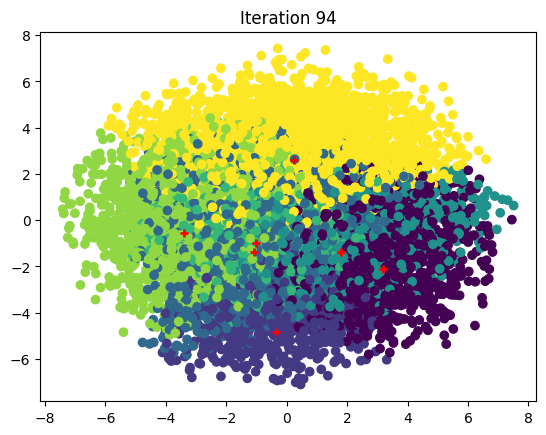

Iteration 94

Centroids:
         d0        d1        d2        d3
0  3.342802  3.770938  3.429903  8.175547
1  2.752566  3.550267  2.758520  2.640856
2  6.288111  8.074962  2.937102  4.510117
3  7.918194  2.893005  2.825065  3.757739
4  3.065260  2.683308  7.583267  3.557814
5  3.046034  7.856981  7.022736  4.123949
6  7.541876  4.539150  7.543407  5.595153

Distances:
              0          1          2          3         4         5         6
0      3.218614   7.138838   7.416588   9.139859  7.067886  6.110854  7.799484
1      5.600252   8.916268   6.698042   5.648487  9.625798  9.707197  6.401306
2      8.102903  11.089748   9.373992  12.089023  8.818337  6.232396  8.087844
3     10.838218   9.619357  10.442979   7.467115  6.591056  9.599428  5.716875
4      5.832080   4.645087   6.983051   5.661214  1.222214  5.085619  4.268263
...         ...        ...        ...        ...       ...       ...       ...
9995  11.547108  11.165130   7.802628   9.627296  9.264121  7.008664  6.11

In [397]:
def kMeansCPU(dataset:pd.DataFrame, k=3, maxIter=100, plotResults=False, debug=False):
    if plotResults:
        # Inicializando variáveis para exibição gráfica
        pca = PCA(n_components=2) # dois eixos no gráfico
        dataset_2D = pca.fit_transform(dataset)

    # Gerando centróides iniciais randomicamente
    centroids = pd.concat([(dataset.apply(lambda x: float(x.sample().iloc[0]))) for _ in range(k)], axis=1)
    centroids_OLD = pd.DataFrame()

    iteration = 1

    while iteration <= maxIter and not centroids_OLD.equals(centroids):
        if plotResults or debug: clear_output(wait=True)
        if debug: debugStr = f'Iteration {iteration}\n\nCentroids:\n{centroids.T}\n\n'

        # Para cada datapoint, calcular distâncias entre ele e cada centróide; depois, encontrar o centróide mais próximo e salvar seu index
        distances = centroids.apply(lambda x: np.sqrt(((dataset - x) ** 2).sum(axis=1)))
        if debug: debugStr += f'Distances:\n{distances}\n\n'
        closestCent = distances.idxmin(axis=1)
        del distances
        if debug: debugStr += f'Closest centroid index:\n{closestCent}\n\n'

        centroids_OLD = centroids
        centroids = dataset.groupby(closestCent).apply(lambda x: np.exp(np.log(x).mean())).T

        if plotResults:
            # Plotando clusters
            centroids_2D = pca.transform(centroids.T)
            plt.title(f'Iteration {iteration}')
            plt.scatter(x=dataset_2D[:,0], y=dataset_2D[:,1], c=closestCent)
            plt.scatter(x=centroids_2D[:,0], y=centroids_2D[:,1], marker='+', linewidths=2, color='red')
            plt.show()

        if debug: print(debugStr)

        iteration += 1



kMeansCPU(dataset, K, MAX_ITERATIONS, plotResults=True, debug=DEBUG)